<a href="https://colab.research.google.com/github/DemianVL18/Analisis-de-Datos/blob/main/Separatrices_y_Regresi%C3%B3n_Multilineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introducción.
 Estoy a cargo del desarrollo de un estudio sobre el mercado laboral de científicos de datos en Latinoamérica. Para ello, necesito construir, procesar y analizar una base de datos que contenga las ofertas laborales publicadas en distintos países de la región.

El objetivo de esta tarea es realizar un análisis exploratorio de los datos, identificar relaciones o tendencias entre diversas variables y extraer conclusiones útiles que permitan plantear un modelo predictivo de los salarios. Este modelo considerará factores como el país, el nivel de formación, la experiencia profesional y/o indicadores asociados a las compañías.

## Datos de Entrada.

La base de datos final de ofertas de empleo para Cientistas de Datos en Sudamérica están disponibles en el siguiente link:

https://raw.githubusercontent.com/cjramirezt/linkdn-jobs/main/nombre_del_archivo.csv

Esta base de datos contiene las siguientes variables:

* `Country`: país del anuncio.
* `Location`: ubicación del empleo.
* `Title`: título del cargo ofrecido.
* `Company`: nombre de la compañía.
* `Url`: URL del anuncio.
* `CountryScore`: *Índice global de innovación* del país del anuncio.
* `English`: requisito de inglés para el empleo. 1: requiere idioma inglés, 0: no requiere idioma inglés.
* `EducationLevel`: años de formación profesional requeridos para el cargo. 0: no requiere formación profesional, 1: formación técnica básica, 2: dos años de formación técnica, 3: tres años de formación técnica,     4: bachiller, 5: título profesional, 6: postgrado.
* `YearsExperience`: años de experiencia laboral requeridos.
* `CompanyScore`: calificación de ambiente laboral de la compañía.




In [41]:
import pandas as pd  # Para manipulación y análisis de datos
import seaborn as sns  # Para visualización estadística de datos
import matplotlib.pyplot as plt  # Para crear gráficos y visualizaciones
import statsmodels.api as sm  # Para aplicar modelos estadísticos y econométricos
import numpy as np  # Para operaciones matemáticas y manejo de arrays
import warnings; warnings.filterwarnings("ignore")  # Para ignorar advertencias y mantener limpia la salida

In [42]:
linkdn = pd.read_csv("https://raw.githubusercontent.com/cjramirezt/linkdn-jobs/main/nombre_del_archivo.csv", sep=';')
linkdn

,Country,Location,Title,Company,Url,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
0,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BICE VIDA,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,3,6,6.683722,2621
1,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BNamericas,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,10.035329,2195
2,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist.,Fuerza Laboral,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,4,9,4.988700,3474
3,Chile,"Rancagua, O'Higgins Region, Chile",Data Scientist,Agrosuper,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,1.766855,2195
4,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,MAS Analytics,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,1,4,6.331954,1037
...,...,...,...,...,...,...,...,...,...,...,...
989,Guyana,"Mahaica, Demerara-Mahaica, Guyana",Lead Ruby on Rails Engineer,Aha!,https://gy.linkedin.com/jobs/view/lead-ruby-on...,NaN,1,1,4,5.924260,606
990,Guyana,Guyana,Sr. Security Engineer (Ruby on Rails experienc...,Aha!,https://gy.linkedin.com/jobs/view/sr-security-...,NaN,1,6,10,4.856359,1570
991,Guyana,Guyana,Sr. Ruby on Rails Engineer,Aha!,https://gy.linkedin.com/jobs/view/sr-ruby-on-r...,NaN,0,1,5,6.040759,449
992,Guyana,"Mahaica, Demerara-Mahaica, Guyana",Sr. Ruby on Rails Engineer,Aha!,https://gy.linkedin.com/jobs/view/sr-ruby-on-r...,NaN,0,2,7,4.944933,696


In [43]:
linkdn.columns  # Muestra la lista de nombres de columnas del DataFrame llamado 'linkdn'

Index(['Country', 'Location', 'Title', 'Company', 'Url', 'CountryScore',
       'English', 'EducationLevel', 'YearsExperience', 'CompanyScore',
       'SalaryUSD'],
      dtype='object')

### 1. ¿Cómo se distribuyen los datos de empleos por país?  

Se generará un gráfico de barras o un resumen estadístico que muestre claramente la distribución de los datos por país. A partir de esta visualización, se analizará si los datos están balanceados o si existen países cuya representación en la base sea limitada o poco significativa.

Funciones útiles para este análisis: sns.countplot(), pd.groupby(), pd.pivot_table().

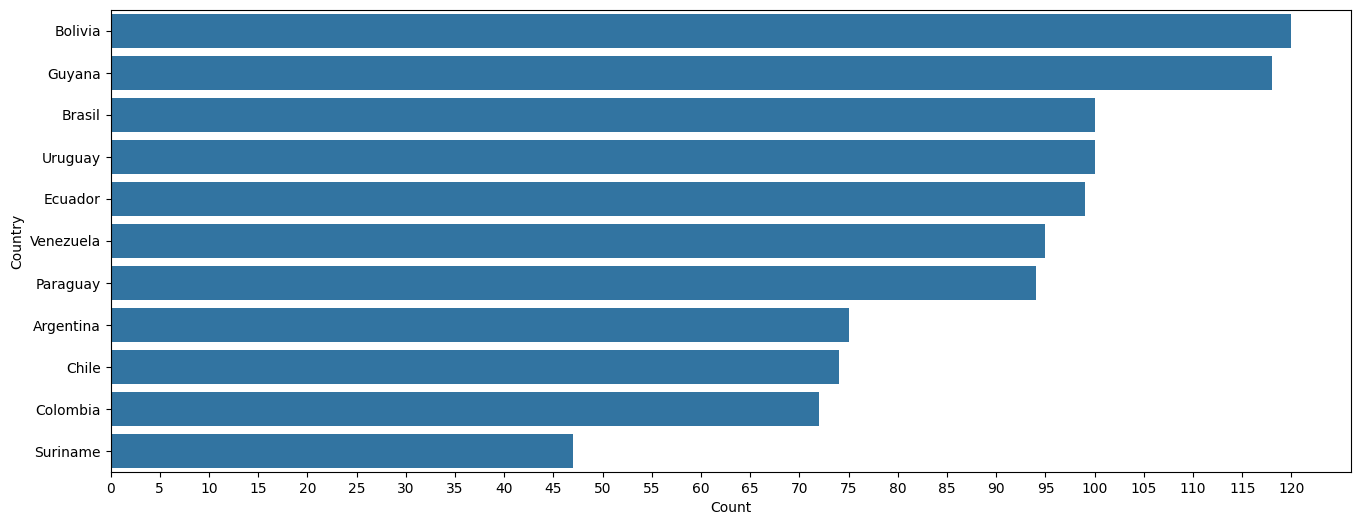

In [44]:
trabajos_por_pais = linkdn['Country'].value_counts().reset_index()  # Cuenta cuántas ofertas hay por país y reinicia el índice
trabajos_por_pais.columns = ['Country', 'Count']  # Renombra las columnas para mayor claridad

plt.figure(figsize=(16, 6))  # Define el tamaño del gráfico
sns.barplot(x='Count', y='Country', data=trabajos_por_pais)  # Crea un gráfico de barras horizontal con seaborn
plt.xticks(range(0, max(trabajos_por_pais['Count'])+1, 5))  # Ajusta las marcas del eje x en intervalos de 5
plt.show()  # Muestra el gráfico

### 2. Estudiar la distribución de salarios en el dataset, y analizando la existencia de datos anómalos.

a) Se debe generar un histograma para la variable SalaryUSD, incorporando además una curva de densidad de probabilidad (kde).

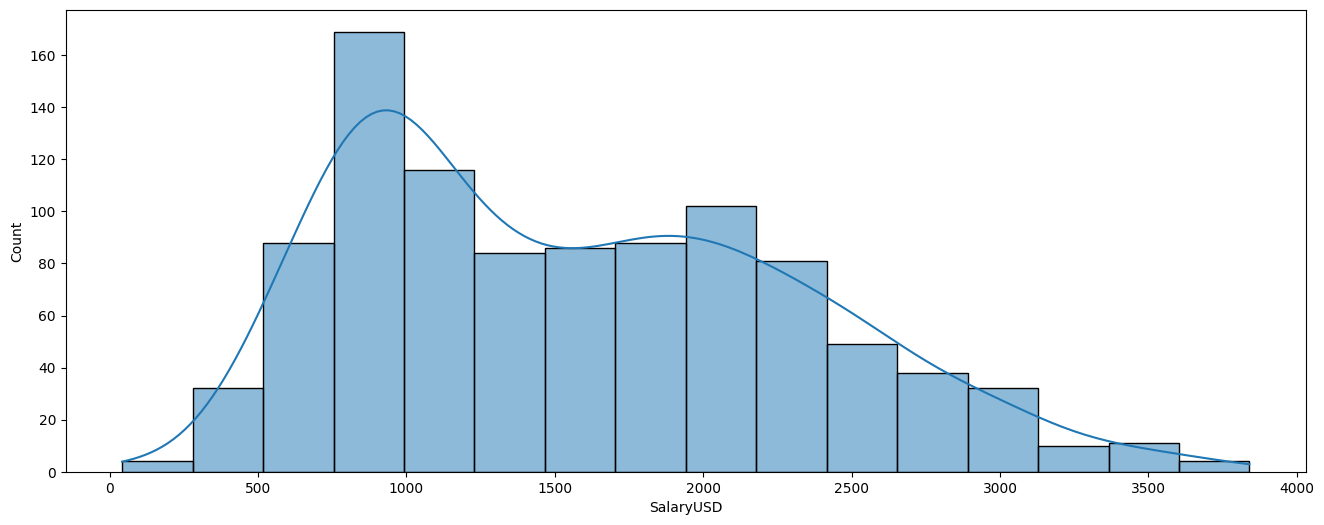

In [45]:
plt.figure(figsize=(16, 6))  # Define el tamaño del gráfico
sns.histplot(data=linkdn, x='SalaryUSD', kde=True)  # Crea un histograma de la variable SalaryUSD con curva de densidad (kde)
plt.show()  # Muestra el gráfico

para calcular los cuartiles y otros estadigrafos de dispersion se puede utilizar:

In [46]:
Estadigrafos = linkdn['SalaryUSD'].describe()  # Calcula estadísticos descriptivos (como media, mediana, desviación estándar, etc.) para la variable SalaryUSD
Estadigrafos  # Muestra los estadísticos calculados

,SalaryUSD
count,994.000000
mean,1571.899396
std,753.686538
min,42.000000
25%,933.000000
50%,1468.000000
75%,2124.750000
max,3840.000000


Para generar un boxplt:

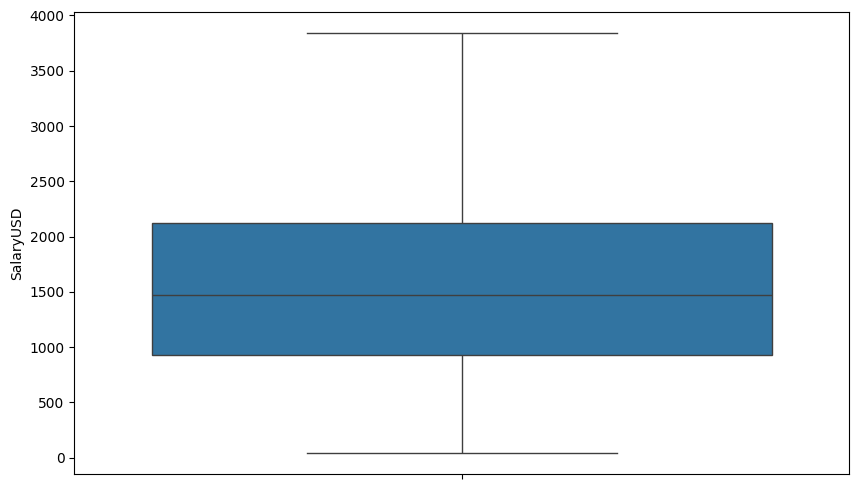

In [47]:
plt.figure(figsize=(10, 6))  # Define el tamaño del gráfico
sns.boxplot(data=linkdn, y='SalaryUSD')  # Crea un boxplot para visualizar la distribución y posibles outliers de SalaryUSD
plt.show()  # Muestra el gráfico

### 3. ¿Cómo se comparan en general los salarios promedio de Cientistas de Datos por país?

Se debe generar un gráfico de cajas que permita visualizar la media y la dispersión de los salarios (SalaryUSD) según país. Además, se recomienda analizar los resultados para identificar cuáles son los países con los salarios medios más altos y más bajos. Para complementar la visualización, también se sugiere utilizar un gráfico violinplot, que permite observar la distribución completa de los datos.

Funciones útiles: sns.boxplot(), sns.violinplot()



La mayoria de los paises tienen salarios sobre los 1500 dolares y en general presentan una gran dispercion en los salarios, siendo Chile (2465.635135 USD) el pais que presenta un mejor promedio en los salarios y Venezuela (740.915789 USD)con el promedio de salario mas bajo.

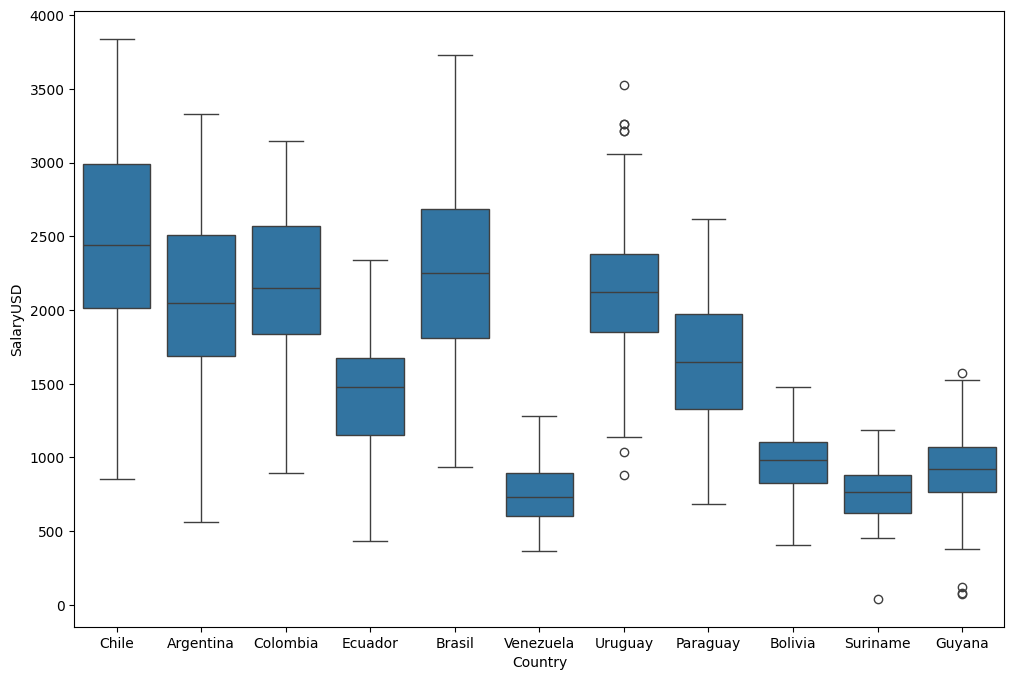

In [48]:
plt.figure(figsize=(12, 8))  # Define el tamaño del gráfico
sns.boxplot(data=linkdn, x='Country', y='SalaryUSD')  # Crea un boxplot para comparar la distribución de salarios por país
plt.show()  # Muestra el gráfico

### 4. ¿Influye el manejo del idioma inglés en los salarios? ¿Influye (o no) de la misma manera para todos los países?

Se debe generar un resumen estadístico junto con un gráfico que permitan responder de manera fundamentada la pregunta planteada. Además, se debe argumentar la respuesta con base en los resultados obtenidos.

Funciones útiles: sns.boxplot(), pd.groupby(), pd.pivot_table()


In [49]:
summary = linkdn.groupby('English')['SalaryUSD'].describe()  # Genera un resumen estadístico de SalaryUSD agrupado según el nivel de inglés
summary  # Muestra el resumen estadístico generado

,count,mean,std,min,25%,50%,75%,max
English,,,,,,,,
0,479.0,1375.311065,649.486432,42.0,808.0,1295.0,1866.0,3264.0
1,515.0,1754.745631,797.248839,81.0,1030.0,1710.0,2366.0,3840.0


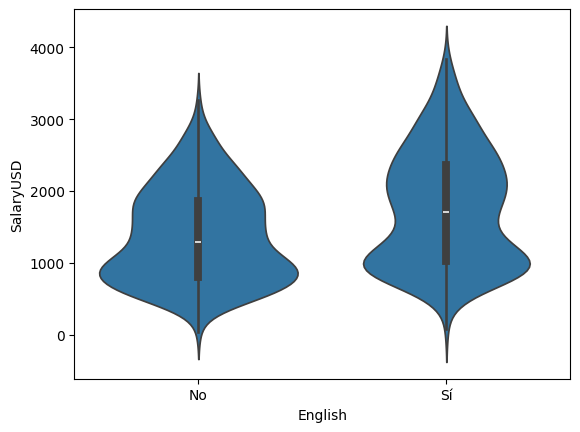

In [50]:
sns.violinplot(data=linkdn, x='English', y='SalaryUSD')  # Crea un gráfico violin que muestra la distribución de SalaryUSD según nivel de inglés
plt.xticks([0, 1], ['No', 'Sí'])  # Cambia las etiquetas del eje x para mayor claridad
plt.show()  # Muestra el gráfico

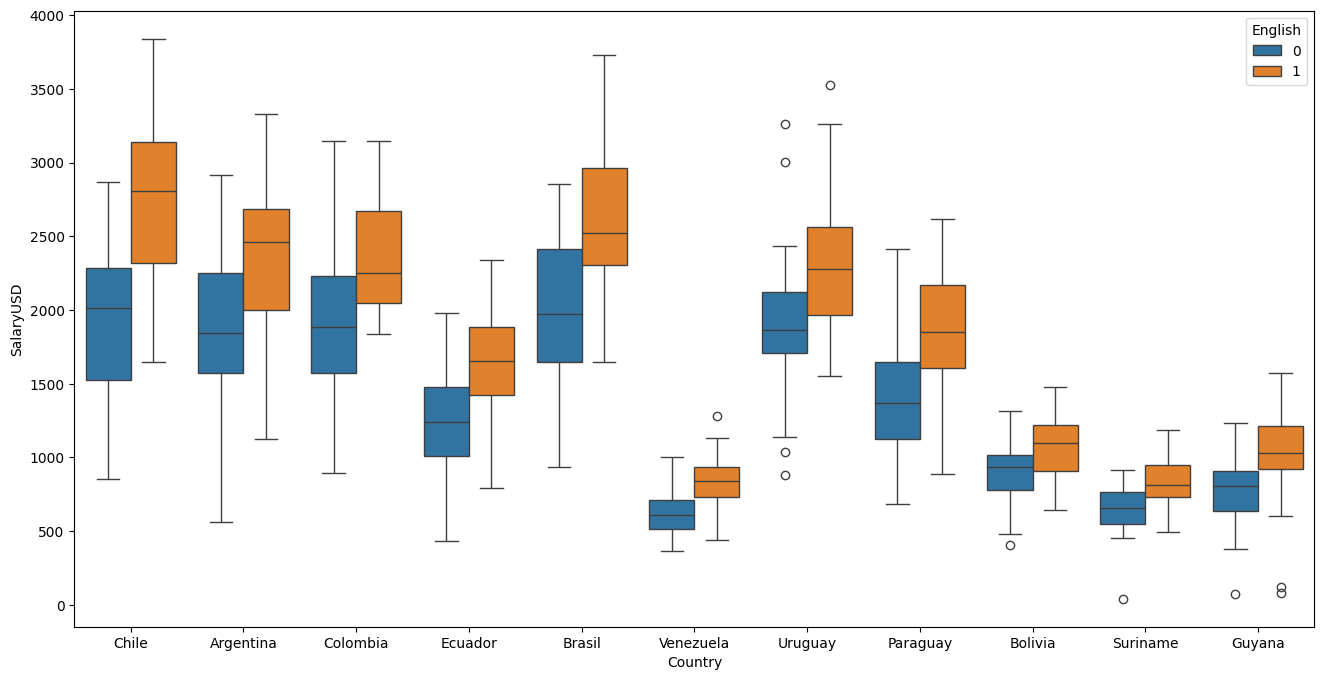

In [51]:
plt.figure(figsize=(16, 8))  # Define el tamaño del gráfico
sns.boxplot(data=linkdn, x="Country", y="SalaryUSD", hue="English")  # Crea un boxplot que muestra salarios por país, diferenciando por nivel de inglés
plt.show()  # Muestra el gráfico


### 5. Análisis de los años de experiencia y nivel educacional requeridos en los distintos países de Sudamérica
Se debe analizar si los años de experiencia y el nivel educacional requeridos varían entre los países o si son similares. Para ello, se recomienda generar una tabla resumen y gráficos que muestren los promedios de las variables EducationLevel y YearsExperience por país. A partir de estos resultados, se debe fundamentar una respuesta que destaque diferencias significativas o similitudes.

Funciones útiles: sns.boxplot(), pd.groupby(), pd.pivot_table().


Al observar la tablas y los graficos es notorio que los pais ser comportan de manera similar en el nivel de educacion y en los años de experiencia. En cuanto al nivel de educacion la media de todos los paises esta cercana a 3 y poseen una desviacion cercana a 1 lo que significa que a variabilidad de los datos es relativamente baja. En el caso de los años de experiencia los datos se centran el los 7 años de experiencia y con una desviacion alrededor de 1.5 que sigue siendo una variabilidad baja.

In [52]:
linkdn.groupby('Country')[['EducationLevel', 'YearsExperience']].describe()
# Genera un resumen estadístico para EducationLevel y YearsExperience agrupado por país


EducationLevel                                               \
                   count      mean       std  min  25%  50%  75%  max   
Country                                                                 
Argentina           75.0  3.013333  1.179708  0.0  2.0  3.0  4.0  6.0   
Bolivia            120.0  2.983333  0.987173  1.0  2.0  3.0  4.0  5.0   
Brasil             100.0  3.070000  1.046929  1.0  2.0  3.0  4.0  5.0   
Chile               74.0  2.756757  1.144502  1.0  2.0  3.0  4.0  5.0   
Colombia            72.0  3.041667  0.984922  1.0  2.0  3.0  4.0  6.0   
Ecuador             99.0  2.848485  1.172505  0.0  2.0  3.0  4.0  5.0   
Guyana             118.0  2.974576  1.120606  1.0  2.0  3.0  4.0  6.0   
Paraguay            94.0  3.117021  1.144001  0.0  2.0  3.0  4.0  6.0   
Suriname            47.0  3.042553  0.907875  1.0  3.0  3.0  4.0  5.0   
Uruguay            100.0  2.950000  1.018763  1.0  2.0  3.0  4.0  6.0   
Venezuela           95.0  2.873684  1.132143  1.0  2.0  3.0  3.0  6.0   

          YearsExperience                                                
                    count      mean       std  min  25%  50%  75%   max  
Country                                                                  
Argentina            75.0  7.040000  1.711961  2.0  6.0  7.0  8.0  11.0  
Bolivia             120.0  6.908333  1.426024  4.0  6.0  7.0  8.0  10.0  
Brasil              100.0  7.130000  1.382831  4.0  6.0  7.0  8.0  11.0  
Chile                74.0  6.770270  1.566318  3.0  6.0  7.0  8.0  11.0  
Colombia             72.0  7.097222  1.445339  4.0  6.0  7.0  8.0  10.0  
Ecuador              99.0  6.878788  1.364811  4.0  6.0  7.0  8.0  10.0  
Guyana              118.0  7.186441  1.437883  4.0  6.0  7.0  8.0  11.0  
Paraguay             94.0  6.936170  1.564447  3.0  6.0  7.0  8.0  11.0  
Suriname             47.0  6.936170  1.579822  4.0  6.0  7.0  8.0  10.0  
Uruguay             100.0  6.900000  1.480513  4.0  6.0  7.0  8.0  11.0  
Venezuela            95.0  6.926316  1.393313  3.0  6.0  7.0  8.0  10.0

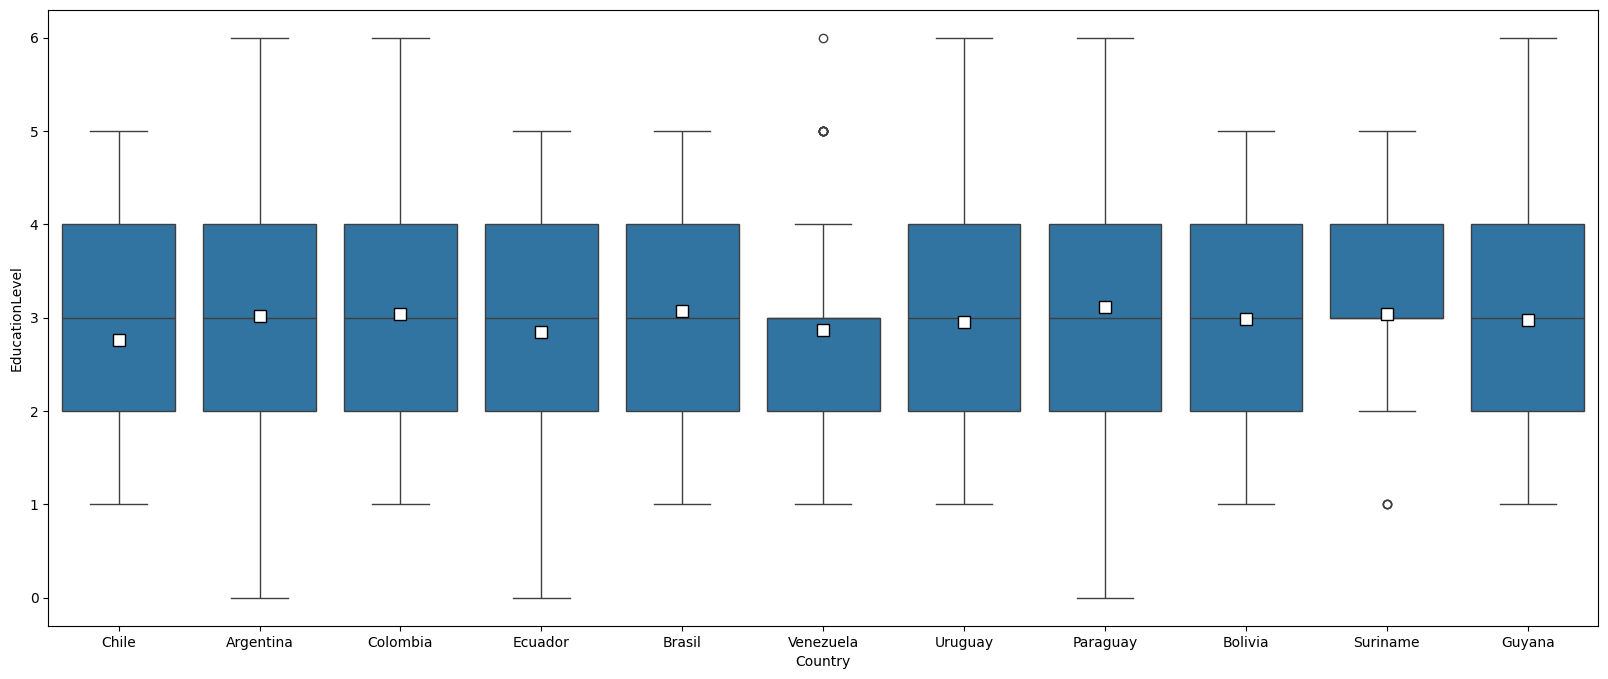

In [53]:
plt.figure(figsize=[20,8])  # Define el tamaño del gráfico
sns.boxplot(
    x='Country',
    y='EducationLevel',
    data=linkdn,
    showmeans=True,  # Muestra la media en el boxplot
    meanprops={      # Propiedades para personalizar el marcador de la media
        "marker":"s",
        "markerfacecolor":"white",
        "markeredgecolor":"black",
        "markersize":"9"
    }
)
plt.show()  # Muestra el gráfico

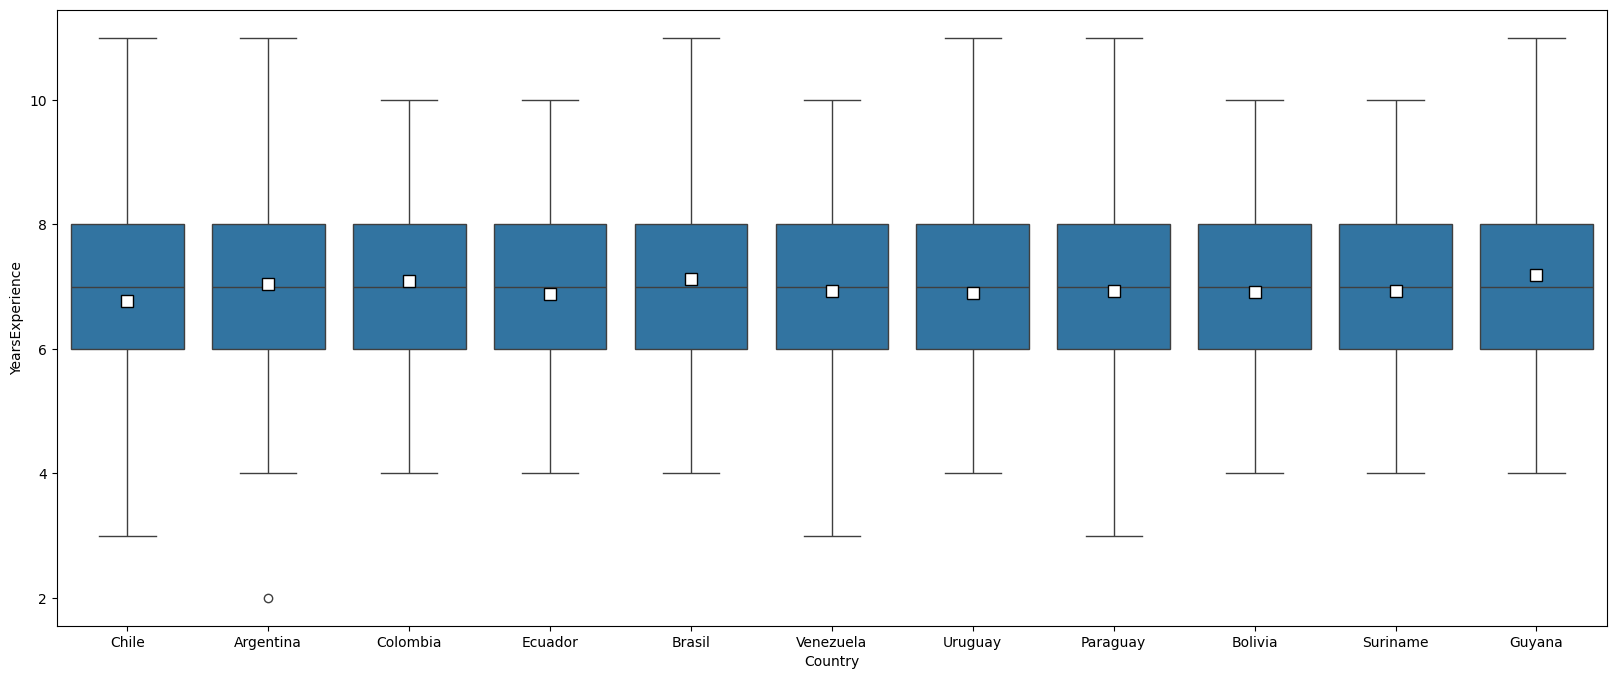

In [54]:
plt.figure(figsize=[20,8])  # Define el tamaño del gráfico
sns.boxplot(
    x='Country',
    y='YearsExperience',
    data=linkdn,
    showmeans=True,  # Muestra la media en el boxplot
    meanprops={      # Personaliza el marcador de la media
        "marker":"s",
        "markerfacecolor":"white",
        "markeredgecolor":"black",
        "markersize":"9"
    }
)
plt.show()  # Muestra el gráfico

### 6. Cálculo y visualización de la matriz de correlación de variables numéricas
Se debe calcular y graficar la matriz de correlación para las variables numéricas presentes en el dataset. Posteriormente, se analizarán los coeficientes de correlación entre SalaryUSD y las demás variables para identificar cuáles tienen mayor relación o relevancia, con el fin de utilizarlas en la construcción de un modelo predictivo de salarios.

Funciones útiles: sns.heatmap(), pd.corr().


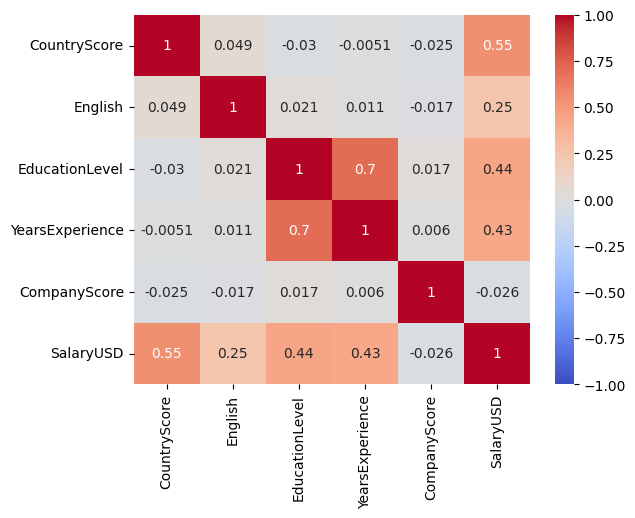

In [55]:
 # Calcula la matriz de correlación para las variables seleccionadas
correlation_matrix = linkdn[['CountryScore','English','EducationLevel','YearsExperience','CompanyScore','SalaryUSD']].corr()
# Grafica la matriz de correlación con anotaciones y esquema de colores
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()  # Muestra el gráfico
 # Ordena las variables según su correlación con SalaryUSD de mayor a menor
salary_correlation = correlation_matrix['SalaryUSD'].sort_values(ascending=False)

### 7. Análisis gráfico de la relación entre salarios y otras variables
a) Se debe generar un conjunto de gráficos de dispersión (pairplot) que muestre la relación entre SalaryUSD y las demás variables, diferenciando por país. Para ello, se recomienda revisar cuidadosamente la documentación y los parámetros de la función sns.pairplot() para personalizar la visualización.

b) A partir de los gráficos, se debe analizar y comentar:

¿Qué correlaciones se pueden identificar?

¿Varían estas correlaciones según el país?

¿Son coherentes las conclusiones obtenidas de los gráficos con la matriz de correlación calculada previamente?

Funciones útiles: sns.pairplot().


En general los datos estan muy dispersos y en su gran mayoria se puede inferir que tienen un correlacion cercana al cero lo que se puede identificar en el grafico de la pregunta 6 y 8. Centrandose en el Salario las variables con las que tiene una mayor correlacion son el nivel de educacion y los años de experiencia las que tendrian una correlaciuon cercana al 1 ya que mientas mas años de experiencia y mayor nivel de educacion el salario llega a ser mucha mas alto. Otras variables que tendrian una tendencia a una correlacion positiva es CountryScore e Ingles que son datos muy dispersos pero que al aumentar los valores suelen tener mayores sueldos pero no estarian directamente relacionados.

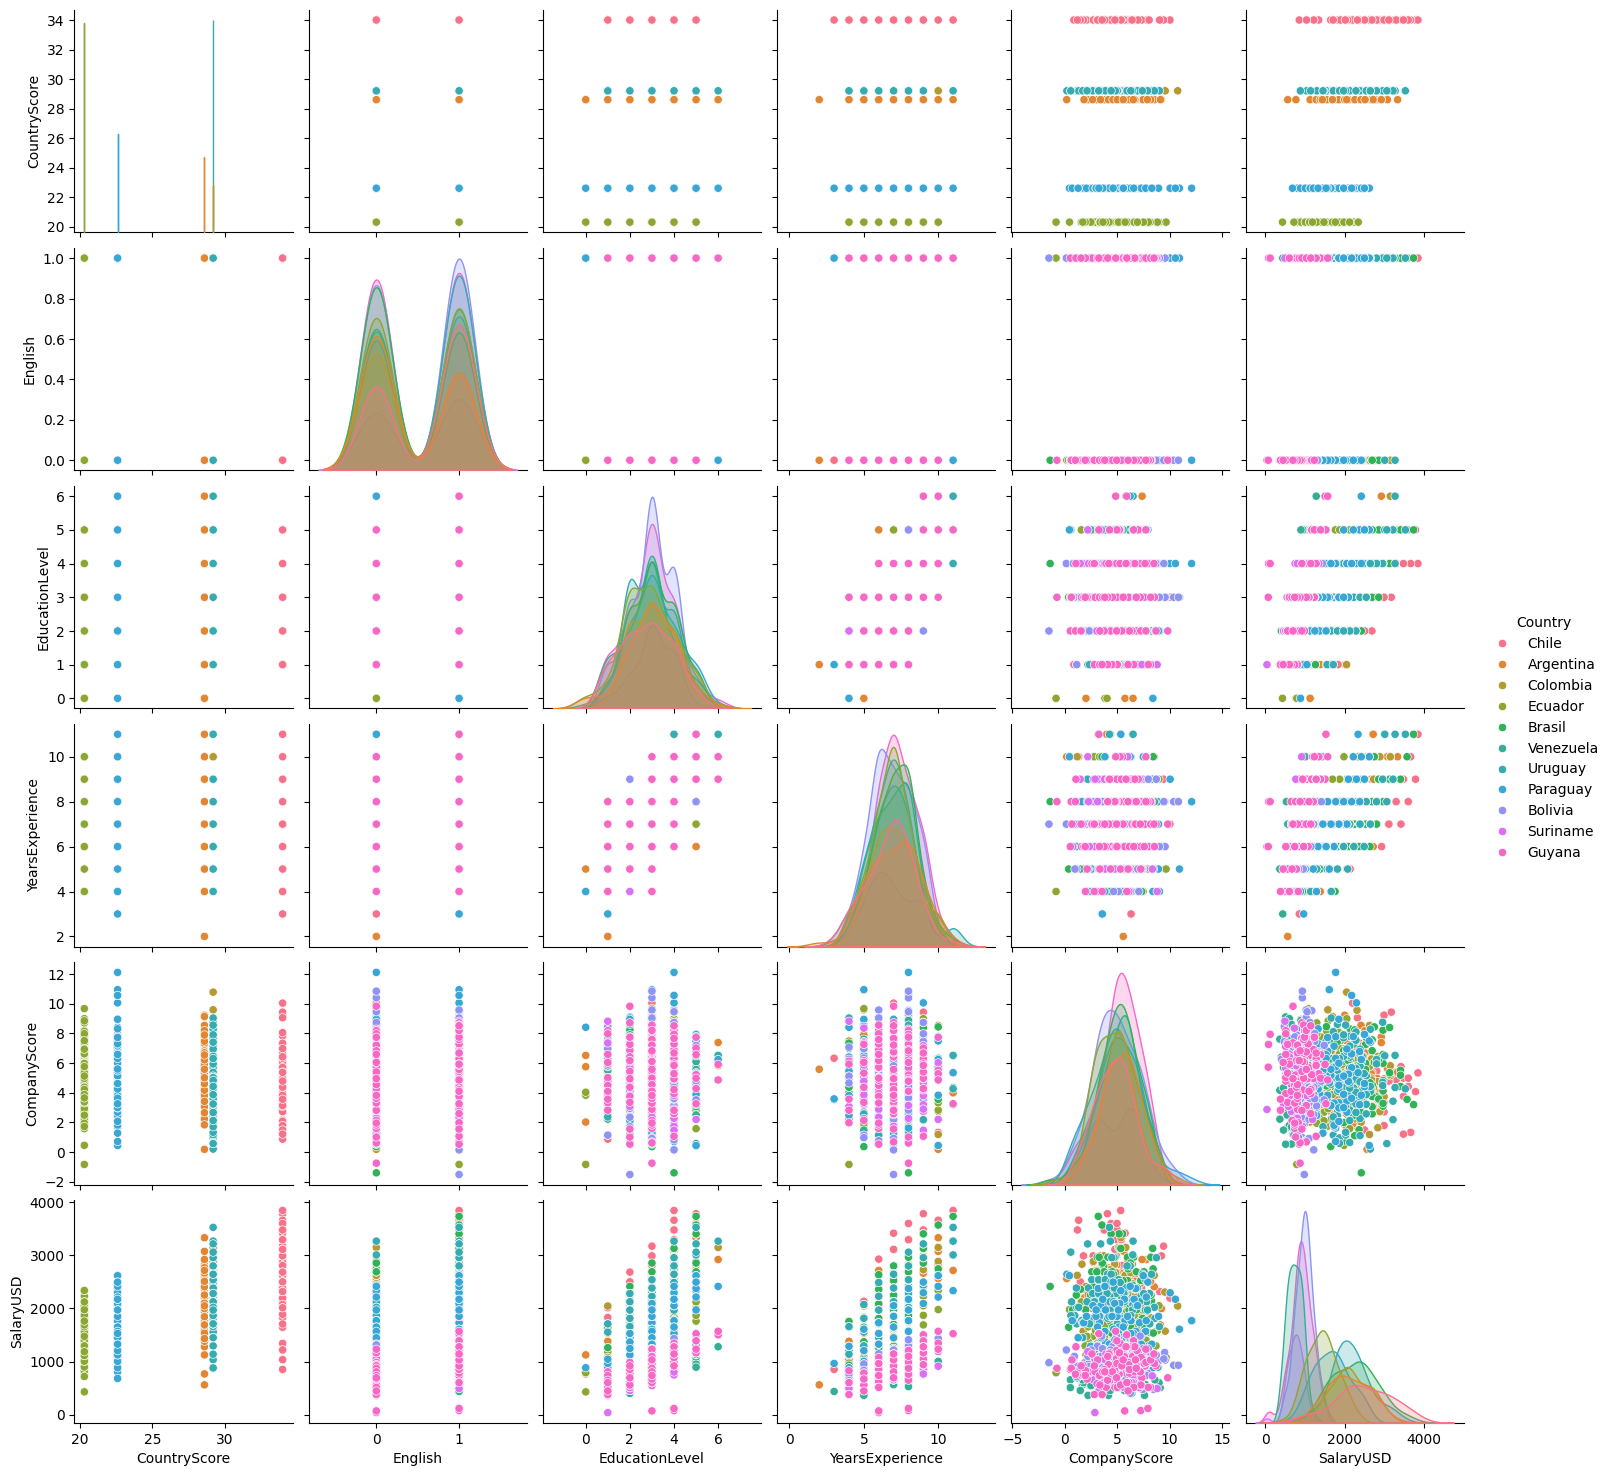

In [56]:
# Lista de variables seleccionadas para el análisis
variables_de_interes = ['CountryScore','English','EducationLevel','YearsExperience','CompanyScore','SalaryUSD', 'Country']
# Selecciona estas variables del DataFrame original
data_subset = linkdn[variables_de_interes]
# Genera gráficos de dispersión diferenciando por país
sns.pairplot(data_subset, x_vars=['CountryScore','English','EducationLevel','YearsExperience','CompanyScore','SalaryUSD'], hue='Country')
# Muestra los gráficos
plt.show()

### 8. Análisis de correlación para un país específico
a) Se debe seleccionar el subconjunto del DataFrame correspondiente a un país elegido y calcular nuevamente la matriz de correlación para ese subconjunto de datos.

b) Se debe analizar cómo varían los resultados respecto a la matriz de correlación calculada previamente para el conjunto completo de datos (punto 6), y extraer conclusiones relevantes que puedan aportar al desarrollo de un modelo predictivo de salarios.

Funciones útiles: sns.heatmap(), pd.corr().

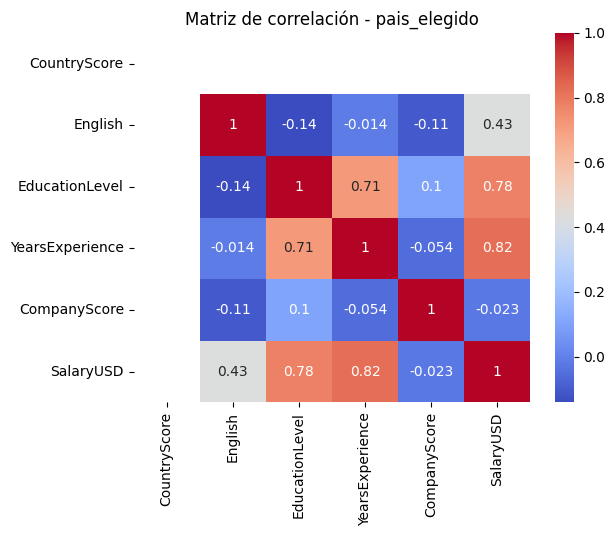

In [58]:
pais_elegido_data = linkdn[linkdn['Country'] == 'Uruguay'][variables_de_interes]

# Seleccionar solo columnas numéricas
pais_elegido_data_numerica = pais_elegido_data.select_dtypes(include=['number'])

pais_elegido_corr = pais_elegido_data_numerica.corr()

sns.heatmap(pais_elegido_corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación - pais_elegido')
plt.show()

### 9. Construcción y análisis de un modelo de regresión multilineal para el conjunto completo y un país específico
a) Se debe indicar claramente cuáles variables predictoras se incluirán en el modelo de regresión multilineal, justificando la selección con base en análisis previos (por ejemplo, correlaciones y relevancia para explicar SalaryUSD).

b) Implementar la regresión lineal utilizando la librería statsmodels.

c) Imprimir y analizar el resumen de resultados de la regresión. Se debe comentar sobre la calidad del ajuste multilineal y la importancia relativa de cada variable predictora.

d) Repetir los pasos b) y c) para el subconjunto de datos correspondiente al país elegido en el punto 8, y comparar los resultados con los obtenidos en el modelo global.

Funciones útiles: statsmodels, sm.OLS(y, X), model.fit(), results.summary().


Los resultados del ajuste multilineal son bastante buenos, en el caso de la base de datos general el R-squared: 0.978 lo que indica que llegaría a ser una predicción bastante asertiva en cuanto al sueldo posible. En este caso hay cuatro variables que toman un valor significativo para que la predicción pueda ser asertiva, las variables serían EducationLevel, YearsExperience, 'English','CountryScore', siendo esta última la más relevante, ya que si esta variable se elimina la acertividad baja a un 0.280 y siendo la menos relevantes en este caso YearsExperience, ya que al eliminarla la asertividad baja a un 0.911 lo que sigue siendo considerablemente bueno.

Al poder analizar los datos del pais (Uruguay), los resultados del ajuste multilineal son exelentes, ya que tienen un R-squared:1 lo que implica que tendría una predicción perfecta, en este caso específico las variables a considerar para poder realizar esta predicción seria 'EducationLevel', 'YearsExperience', 'English' en las cuales por si solas la más influyente es 'YearsExperience' que tendría una predicción de 0.678 y la más baja 'English' con 0.182, sin embargo, es una de las variables más importantes, ya que al eliminarla la precisión baja a un 0.753 y al sacar cualquiera de las otras variables la predicción solo baja alrededor de 0.85. Es importamte destacar que al sumar los coeficientes según los datos, se logra una predicción exacta como se puede observar en el ejemplo de abajo.

In [59]:
# Elimina filas con datos faltantes en variables clave
data_cleaned = linkdn.dropna(subset=['EducationLevel', 'YearsExperience', 'English', 'CountryScore', 'SalaryUSD', 'CompanyScore'])
X = data_cleaned[['EducationLevel', 'YearsExperience', 'English', 'CountryScore']]  # Variables predictoras seleccionadas
y = data_cleaned['SalaryUSD']  # Variable objetivo
X = sm.add_constant(X)  # Agrega columna de unos para el intercepto del modelo
model = sm.OLS(y, X)  # Define el modelo de regresión lineal ordinaria
results = model.fit()  # Ajusta el modelo con los datos
print(results.summary())  # Imprime el resumen detallado del ajuste del modelo

                            OLS Regression Results                            
Dep. Variable:              SalaryUSD   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     5560.
Date:                Wed, 23 Jul 2025   Prob (F-statistic):               0.00
Time:                        20:14:39   Log-Likelihood:                -3055.0
No. Observations:                 514   AIC:                             6120.
Df Residuals:                     509   BIC:                             6141.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1993.5830     30.944    -

In [60]:
X = pais_elegido_data[['EducationLevel', 'YearsExperience']]  # Variables predictoras seleccionadas para el país elegido
y = pais_elegido_data['SalaryUSD']  # Variable objetivo para el país elegido
X = sm.add_constant(X)  # Agrega la constante para el intercepto del modelo
model = sm.OLS(y, X)  # Define el modelo de regresión lineal para el subconjunto de datos
results_pais_elegido = model.fit()  # Ajusta el modelo a los datos del país
print(results_pais_elegido.summary())  # Imprime el resumen detallado del modelo ajustado

                            OLS Regression Results                            
Dep. Variable:              SalaryUSD   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     147.5
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           3.83e-30
Time:                        20:15:08   Log-Likelihood:                -693.72
No. Observations:                 100   AIC:                             1393.
Df Residuals:                      97   BIC:                             1401.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             298.9040    122.182     

In [62]:
Uruguay = pais_elegido_data[pais_elegido_data["Country"] == "Uruguay"]  # Filtra el DataFrame para obtener solo los registros de Uruguay
Uruguay.head()  # Muestra las primeras filas del DataFrame filtrado

,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD,Country
515,29.2,0,2,5,5.893376,1296,Uruguay
516,29.2,1,2,6,3.949988,1969,Uruguay
517,29.2,1,1,6,1.140096,1710,Uruguay
518,29.2,1,3,7,2.253906,2383,Uruguay
519,29.2,1,2,5,2.671204,1814,Uruguay


In [68]:
def SalaryUSD(EducationLevel, YearsExperience, English):
    # Calcula el salario estimado usando la fórmula de regresión con coeficientes dados
    Salario = 0.8553 + 258.8695 * EducationLevel + 155.4372 * YearsExperience + 517.8718 * English
    print(Salario)  # Muestra el salario calculado

In [69]:
SalaryUSD(2,5,0)

1295.7803
